# Photon Attenuation Data Analysis

In [1]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import glob
import os

In [2]:
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]

# Useful helper functions
## Reads multiple files
def read_multi_csv(start_sample,end_sample,path):     
    samples = list(range(start_sample,end_sample+1))     
    dfs = []
    for N in samples:         
        file = 'https://gitlab.com/xmoskala/labdata/-/raw/main/photonlab'+path+str(N)+'.SPE'  
        file = file.replace(" ", "%20")
        #print (file)         
        df = pd.read_csv(file, skiprows=skip, header=0, names=["Data"])         
        dfs.append(df) 
    return dfs
## Averages the multiple files read
def aver(files):
    sample = files[0]
    for i in range(len(files)):
        sample = sample.add(files[i], axis=0)
    sample = sample.div(len(files)).add(0.5).astype(int)
    return sample


In [3]:
def url(path):
    path = 'https://gitlab.com/xmoskala/labdata/-/raw/main/photonlab'+path+'.Spe'
    path = path.replace(" ", "%20")
    return path
Bg60 = pd.read_csv(url("/9-6-22/Background (60s)"), skiprows=skip, header=0, names=["Data"])  
Cs60 = pd.read_csv(url("/9-6-22/Cs/Cs (60s)"), skiprows=skip, header=0, names=["Data"])  
CsAlH60 = pd.read_csv(url("/9-6-22/Cs/Cs Alu High (60s)"), skiprows=skip, header=0, names=["Data"])  
CsAlM60 = pd.read_csv(url("/9-6-22/Cs/Cs Alu Mid (60s)"), skiprows=skip, header=0, names=["Data"])  
CsAlL60 = pd.read_csv(url("/9-6-22/Cs/Cs Alu Low (60s)"), skiprows=skip, header=0, names=["Data"])  
CsCuH60 = pd.read_csv(url("/9-6-22/Cs/Cs Cu High (60s)"), skiprows=skip, header=0, names=["Data"])  
CsCuM60 = pd.read_csv(url("/9-6-22/Cs/Cs Cu Mid (60s)"), skiprows=skip, header=0, names=["Data"])  
CsCuL60 = pd.read_csv(url("/9-6-22/Cs/Cs Cu Low (60s)"), skiprows=skip, header=0, names=["Data"])  
CsPbH60 = pd.read_csv(url("/9-6-22/Cs/Cs Pb High (60s)"), skiprows=skip, header=0, names=["Data"])  
CsPbM60 = pd.read_csv(url("/9-6-22/Cs/Cs Pb Mid (60s)"), skiprows=skip, header=0, names=["Data"])  
CsPbL60 = pd.read_csv(url("/9-6-22/Cs/Cs Pb Low (60s)"), skiprows=skip, header=0, names=["Data"])  



In [264]:
#Plot Cesium Data
fig, ax = plt.subplots()
#ax.plot(Bg60, label="Bg")
#ax.plot(Cs60, label="Cs")
#ax.plot(CsAlH60, label="AlH")
#ax.plot(CsAlM60, label="AlM")
#ax.plot(CsAlL60, label="AlL")
ax.plot(CsCuH60, label="CuH")
ax.plot(CsCuM60, label="CuM")
ax.plot(CsCuL60, label="CuL")
#ax.plot(CsPbH60, label="PbH")
#ax.plot(CsPbM60, label="PbM")
#ax.plot(CsPbL60, label="PbL")
#ax.plot(CsAlH60-CsAlL60, label="AlH")
#ax.plot(CsCuH60-CsCuL60, label="CuH")
#ax.plot(CsPbH60-CsPbL60, label="PbH")


plt.xlim(0,2047)
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()
plt.show()

In [5]:
# Read spectrum files (.spe) as .csv with pandas



## Number of samples to average through (Co & Ba have 5 trials [0-4] so it is by default set to 4)
endnumber = 4

## Cesium(Cs) Readings
### Cs Background(Bg)
CsBgFiles=read_multi_csv(0,endnumber,"/9-15-22/Background/Background00")    #Read files
CsBg = aver(CsBgFiles)    #Average

### Cs 
CsFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs/Cs00")    #Read files
Cs = aver(CsFiles)    #Average

### Cs Al
CsAlFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Alu/Cs Alu00")    #Read files
CsAl = aver(CsAlFiles)    #Average

### Cs Cu
CsCuFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Cu/Cs Cu00")    #Read files
CsCu = aver(CsCuFiles)    #Average

### Cs Pb
CsPbFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Pb/Cs Pb00")    #Read files
CsPb = aver(CsPbFiles)    #Average

## Barium(Ba) Readings
### Ba Background(Bg)
BaBgFiles=read_multi_csv(0,endnumber,"/9-20-22/Background/Background00")    #Read files
BaBg = aver(BaBgFiles)    #Average

### Ba 
BaFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba/Ba00")    #Read files
Ba = aver(BaFiles)    #Average

### Ba Al
BaAlFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Alu/Ba Alu00")    #Read files
BaAl = aver(BaAlFiles)    #Average

### Ba Cu
BaCuFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Cu/Ba Cu00")    #Read files
BaCu = aver(BaCuFiles)    #Average

### Ba Pb
BaPbFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Pb/Ba Pb00")    #Read files
BaPb = aver(BaPbFiles)    #Average

## Cobalt(Co) Readings
### Co Background(Bg)
CoBgFiles=read_multi_csv(0,endnumber,"/9-22-22/Background/Background00")    #Read files
CoBg = aver(CoBgFiles)    #Average

### Co 
CoFiles=read_multi_csv(0,endnumber,"/9-22-22/Co/Co00")    #Read files
Co = aver(CoFiles)    #Average

### Co Al
CoAlFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Alu/Co Alu00")    #Read files
CoAl = aver(CoAlFiles)    #Average

### Co Cu
CoCuFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Cu/Co Cu00")    #Read files
CoCu = aver(CoCuFiles)    #Average

### Co Pb
CoPbFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Pb/Co Pb00")    #Read files
CoPb = aver(CoPbFiles)    #Average



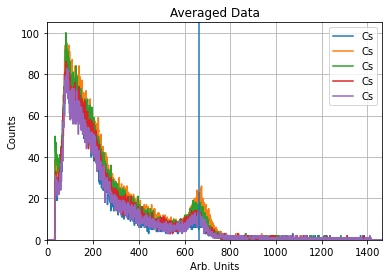

In [6]:
#Plot Cesium Data
Csbin = 0.715 # Bin size from calibration on Maestro
Csy = np.arange(0,2048,Csbin)[0:len(Cs)]
fig, ax = plt.subplots()
ax.plot(Csy, CsBg, label="Cs")
ax.plot(Csy, Cs, label="Cs")
ax.plot(Csy, CsAl, label="Cs")
ax.plot(Csy, CsCu, label="Cs")
ax.plot(Csy, CsPb, label="Cs")
ax.axvline(662)

plt.xlim(0,Csbin*len(Cs))
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

#Plot Barium Data
Babin = 0.70 # Bin size from calibration on Maestro
Bay = np.arange(0,2048,Babin)[0:len(Ba)]
fig, ax = plt.subplots()
ax.plot(Bay, BaBg, label="Cs")
ax.plot(Bay, Ba, label="Cs")
ax.plot(Bay, BaAl, label="Cs")
ax.plot(Bay, BaCu, label="Cs")
ax.plot(Bay, BaPb, label="Cs")
ax.axvline(81)
ax.axvline(356)

plt.xlim(0,Babin*len(Ba))
plt.ylim(0)

ax.set(xlabel='KeV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

#Plot Co Data
Cobin = 0.698 # Bin size from calibration on Maestro
Coy = np.arange(0,2048,Cobin)[0:len(Co)]
fig, ax = plt.subplots()
ax.plot(Coy, CoBg, label="Cs")
ax.plot(Coy, Co, label="Cs")
ax.plot(Coy, CoAl, label="Cs")
ax.plot(Coy, CoCu, label="Cs")
ax.plot(Coy, CoPb, label="Cs")
ax.axvline(1173)
ax.axvline(1332)


plt.xlim(0,Cobin*len(Co))
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

plt.show()

In [7]:
Cobalt = pd.read_csv(r"C:\Users\hanna\Desktop\labdata-main-photonlab\photonlab\9-22-22\Calib\Calib000.SPE", skiprows=skip, header=0, names=["Data"]) 

In [8]:
#Plot Co Data
Cobin = 0.698 # Bin size from calibration on Maestro
Coy = np.arange(0,2048,Cobin)[0:len(Co)]
fig, ax = plt.subplots()
ax.plot(Coy, Cobalt, label="Cs")
ax.axvline(1173)
ax.axvline(1332)


plt.xlim(0,Cobin*len(Co))
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

plt.show()

In [103]:
#Cesium, No absorber
dc1 = Cs-CsBg
Csy = np.arange(0,2048,Csbin)[0:len(Cs)] #approximately add 200 to position
Csy = Csy[800:1100]
dc1 = dc1[800:1100]
plt.plot(Csy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #32
np.max(dc1) #19
np.where(dc1==19) #142
peak = int(Csy[142])
plt.axvline(x=peak+10)
plt.axvline(x=peak-10)
cdcf = dc1[142-10:142+10]
s = np.sum(cdcf)
s

Data    233
dtype: int64

Data    127
dtype: int64

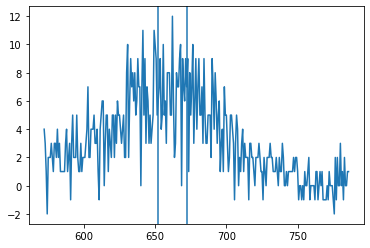

In [104]:
#Cesium, Al
dc1 = CsAl-CsBg
Csy = np.arange(0,2048,Csbin)[0:len(Cs)] #approximately add 200 to position
Csy = Csy[800:1100]
dc1 = dc1[800:1100]
plt.plot(Csy, dc1)
m, std = norm.fit(dc1)
np.max(dc1) #12
np.where(dc1==12) #126
peak = int(Csy[126])
plt.axvline(x=peak+10)
plt.axvline(x=peak-10)
cdcf = dc1[126-10:126+10]
s = np.sum(cdcf)
s

Data    60
dtype: int64

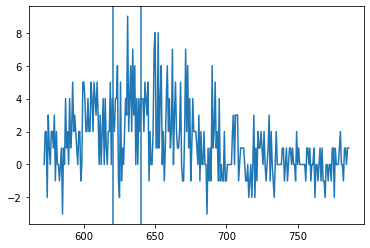

In [105]:
#Cesium, Cu
dc1 = CsCu-CsBg
Csy = np.arange(0,2048,Csbin)[0:len(Cs)] #approximately add 200 to position
Csy = Csy[800:1100]
dc1 = dc1[800:1100]
plt.plot(Csy, dc1)
m, std = norm.fit(dc1)
np.max(dc1) #9
np.where(dc1==9) #82
peak = int(Csy[82])
plt.axvline(x=peak+10)
plt.axvline(x=peak-10)
cdcf = dc1[82-10:82+10]
s = np.sum(cdcf)
s

In [106]:
#Cesium, Pb
dc1 = CsPb-CsBg
Csy = np.arange(0,2048,Csbin)[0:len(Cs)] #approximately add 200 to position
Csy = Csy[800:1100]
dc1 = dc1[800:1100]
plt.plot(Csy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #13
np.max(dc1) #6
np.where(dc1==6) #91, 128, 134
peak = int((Csy[91]+Csy[128]+Csy[134])/3)
plt.axvline(x=peak+10)
plt.axvline(x=peak-10)
cdcf = dc1[177-10:177+10]
s = np.sum(cdcf)
s

Data    15
dtype: int64

In [231]:
#Co, no absorber
dc1 = Co-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1500:1800]
dc1 = dc1[1500:1800]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #6
np.max(dc1) #17
np.where(dc1==17) #74, 155
peak = int((Coy[74]+Coy[155])/2)
plt.axvline(x=peak+6)
plt.axvline(x=peak-6)
cdcf = dc1[115-6:115+6]
s = np.sum(cdcf)
s

Data    146
dtype: int64

In [232]:
#Co, Al
dc1 = CoAl-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1500:1800]
dc1 = dc1[1500:1800]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
np.max(dc1) #14
np.where(dc1==14) #38, 200
peak = int((Coy[38]+Coy[200])/2)
plt.axvline(x=peak+6)
plt.axvline(x=peak-6)
cdcf = dc1[115-6:115+6]
s = np.sum(cdcf)
s

Data    112
dtype: int64

In [233]:
#Co, Cu
dc1 = CoCu-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1500:1800]
dc1 = dc1[1500:1800]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.exp(2))*std 
np.max(dc1) #8
np.where(dc1==8) 
peak = int((Coy[143]+Coy[146]+Coy[154]+Coy[170])/4)
plt.axvline(x=peak+6)
plt.axvline(x=peak-6)
cdcf = dc1[153-6:153+6]
s = np.sum(cdcf)
s

Data    67
dtype: int64

Data    62
dtype: int64

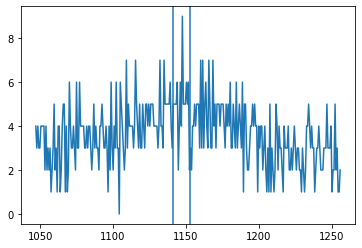

In [234]:
#Co, Pb
dc1 = CoPb-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1500:1800]
dc1 = dc1[1500:1800]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std 
np.max(dc1) #9
np.where(dc1==9) #144
peak = int(Coy[144])
plt.axvline(x=peak+6)
plt.axvline(x=peak-6)
cdcf = dc1[144-6:144+6]
s = np.sum(cdcf)
s

Text(0, 0.5, 'Counts')

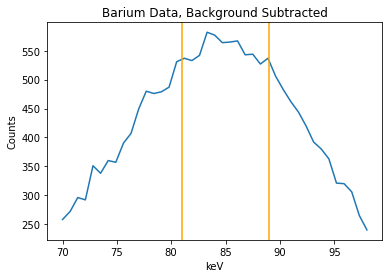

In [267]:
#barium, no back
dc1 = Ba-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[100:141]
dc1 = dc1[100:141]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #244
np.max(dc1) #582
np.where(dc1==582) 
peak = int(Bay[19])
plt.axvline(x=81, color = 'orange')
plt.axvline(x=89, color = 'orange')
cdcf = dc1[11:29]
s = np.sum(cdcf)
s
plt.title("Barium Data, Background Subtracted")
plt.xlabel("keV")
plt.ylabel("Counts")

Data    4723
dtype: int64

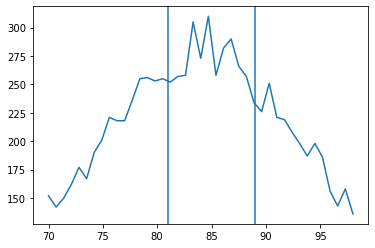

In [230]:
#barium, al
dc1 = BaAl-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[100:141]
dc1 = dc1[100:141]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #244
np.max(dc1) #582
np.where(dc1==582) 
peak = int(Bay[19])
plt.axvline(x=81)
plt.axvline(x=89)
cdcf = dc1[11:29]
s = np.sum(cdcf)
s

Data    1614
dtype: int64

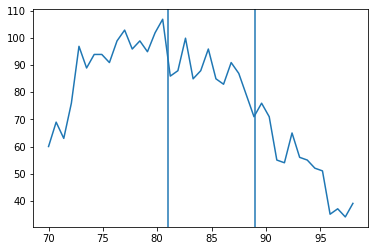

In [229]:
#barium, copper
dc1 = BaCu-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[100:141]
dc1 = dc1[100:141]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #244
np.max(dc1) #582
np.where(dc1==582) 
peak = int(Bay[19])
plt.axvline(x=81)
plt.axvline(x=89)
cdcf = dc1[11:29]
s = np.sum(cdcf)
s

Data    1081
dtype: int64

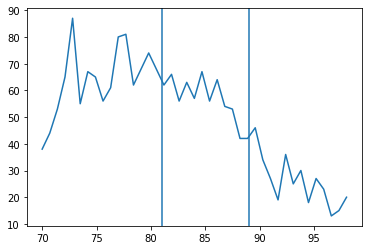

In [228]:
#barium,lead
dc1 = BaPb-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[100:141]
dc1 = dc1[100:141]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #244
np.max(dc1) #582
np.where(dc1==582) 
peak = int(Bay[19])
plt.axvline(x=81)
plt.axvline(x=89)
cdcf = dc1[11:29]
s = np.sum(cdcf)
s

Data    6125
dtype: int64

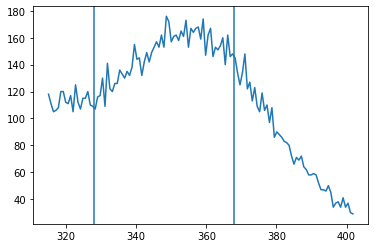

In [208]:
#Ba, none
dc1 = Ba-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[450:575]
dc1 = dc1[450:575]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #std = 40
np.max(dc1) #176
np.where(dc1==176) #144
peak = int(Bay[48])
plt.axvline(x=peak+20)
plt.axvline(x=peak-20)
cdcf = dc1[48-20:48+20]
s = np.sum(cdcf)
s

Data    3643
dtype: int64

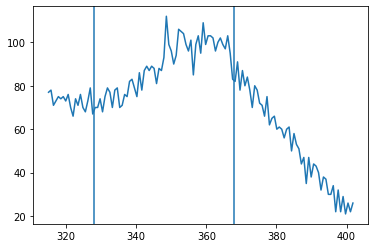

In [212]:
#Ba, Al
dc1 = BaAl-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[450:575]
dc1 = dc1[450:575]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #std = 40
np.max(dc1) #176
np.where(dc1==176) #144
peak = int(Bay[48])
plt.axvline(x=peak+20)
plt.axvline(x=peak-20)
cdcf = dc1[48-20:48+20]
s = np.sum(cdcf)
s

In [213]:
#Ba, Cu
dc1 = BaCu-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[450:575]
dc1 = dc1[450:575]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #std = 40
np.max(dc1) #176
np.where(dc1==176) #144
peak = int(Bay[48])
plt.axvline(x=peak+20)
plt.axvline(x=peak-20)
cdcf = dc1[48-20:48+20]
s = np.sum(cdcf)
s

Data    1249
dtype: int64

In [214]:
#Ba, Pb
dc1 = BaPb-BaBg
Bay = np.arange(0,2048,Babin)[0:len(Ba)] #approximately add 200 to position
Bay = Bay[450:575]
dc1 = dc1[450:575]
plt.plot(Bay, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #std = 40
np.max(dc1) #176
np.where(dc1==176) #144
peak = int(Bay[48])
plt.axvline(x=peak+20)
plt.axvline(x=peak-20)
cdcf = dc1[48-20:48+20]
s = np.sum(cdcf)
s

Data    105
dtype: int64

In [251]:
#Co, no absorber
dc1 = Co-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1800:2000]
dc1 = dc1[1800:2000]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #7
np.max(dc1) #11
np.where(dc1==11) #72
peak = int(Coy[72])
plt.axvline(x=peak+7)
plt.axvline(x=peak-7)
cdcf = dc1[72-7:72+7]
s = np.sum(cdcf)
s

Data    111
dtype: int64

In [254]:
#Co, Al
dc1 = CoAl-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1800:2000]
dc1 = dc1[1800:2000]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #7
np.max(dc1) #11
np.where(dc1==11) #16
peak = int(Coy[16])
plt.axvline(x=peak+7)
plt.axvline(x=peak-7)
cdcf = dc1[16-7:16+7]
s = np.sum(cdcf)
s

Data    89
dtype: int64

Data    45
dtype: int64

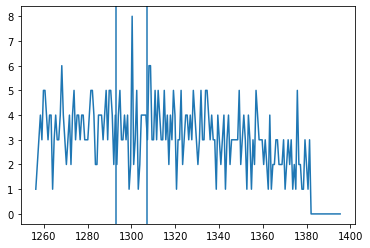

In [257]:
#Co, Cu
dc1 = CoCu-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1800:2000]
dc1 = dc1[1800:2000]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #7
np.max(dc1) #8
np.where(dc1==8) #16
peak = int(Coy[63])
plt.axvline(x=peak+7)
plt.axvline(x=peak-7)
cdcf = dc1[63-7:63+7]
s = np.sum(cdcf)
s

Data    48
dtype: int64

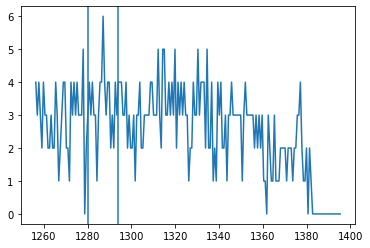

In [262]:
#Co, Pb
dc1 = CoPb-CoBg
Coy = np.arange(0,2048,Cobin)[0:len(Co)] #approximately add 200 to position
Coy = Coy[1800:2000]
dc1 = dc1[1800:2000]
plt.plot(Coy, dc1)
m, std = norm.fit(dc1)
fwhm = 2*np.sqrt(2*np.log(2))*std #7
np.max(dc1) #6
np.where(dc1==6) #16
peak = int(Coy[44])
plt.axvline(x=peak+7)
plt.axvline(x=peak-7)
cdcf = dc1[44-7:44+7]
s = np.sum(cdcf)
s